# Sales Data Analysis

### Load Data

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [148]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
df_train = pd.read_csv('../data/train.csv', na_values=['?', None, 'undefined'])
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [149]:
df_test = pd.read_csv('../data/test.csv', na_values=['?', None, 'undefined'])
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [151]:
df_train["Date"]=pd.to_datetime(df_train["Date"], format='%Y/%m/%d', errors='coerce')
df_test["Date"]=pd.to_datetime(df_test["Date"], format='%Y/%m/%d', errors='coerce')

def holiday(x):
    if x in ['a','b','c']:
        return 1
    return 0
    
def day_month_year(df, col):
    days, months, years = [], [], []
    for datetime in df[col]:
        year, month, day = str(datetime).split(' ')[0].split('-')
        days.append(int(day))
        months.append(int(month))
        years.append(int(year))
    df['Day'] = days
    df['Month'] = months
    df['Year'] = years
    
df_train['Holiday'] = df_train['StateHoliday'].apply(holiday)
df_test['Holiday'] = df_test['StateHoliday'].apply(holiday)

df_train['Holiday'] = df_train['Holiday'] | df_train['SchoolHoliday']
df_test['Holiday'] = df_test['Holiday'] | df_test['SchoolHoliday']

day_month_year(df_train, 'Date')
day_month_year(df_test, 'Date')

### Shapes

In [152]:
print(f" There are {df_train.shape[0]} rows and {df_train.shape[1]} columns")

 There are 1017209 rows and 13 columns


In [153]:
print(f" There are {df_test.shape[0]} rows and {df_test.shape[1]} columns")

 There are 41088 rows and 12 columns


### Missing Values

In [154]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(df_train)
percent_missing(df_test)

The dataset contains 0.0 % missing values.
The dataset contains 0.0 % missing values.


In [155]:
print("Mising Train Data")
df_train.isna().sum()

Mising Train Data


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Holiday          0
Day              0
Month            0
Year             0
dtype: int64

In [156]:
print("Mising Test Data")
df_test.isna().sum()

Mising Test Data


Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
Holiday           0
Day               0
Month             0
Year              0
dtype: int64

In [157]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
 9   Holiday        1017209 non-null  int64         
 10  Day            1017209 non-null  int64         
 11  Month          1017209 non-null  int64         
 12  Year           1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(11), object(1)
memory usage: 100.9+ MB


In [158]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41077 non-null  float64       
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  object        
 7   SchoolHoliday  41088 non-null  int64         
 8   Holiday        41088 non-null  int64         
 9   Day            41088 non-null  int64         
 10  Month          41088 non-null  int64         
 11  Year           41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(9), object(1)
memory usage: 3.8+ MB


### Non Graphical Univariate Analysis

In [126]:
print("Training Set")
df_train.describe()

Training Set


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Holiday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,1.939228e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,3.953693e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [127]:
print("Test Set")
df_test.describe()

Test Set


,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,Holiday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487,0.447868
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802,0.497281
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000,1.000000


### Graphical Univariate Analysis

#### Fix Outliers

In [128]:
# def format_float(value):
#     return f'{value:,.2f}'

# def fix_outlier(df, column_list):
#     for column in column_list:
#         df = df[df[column] < df[column].quantile(0.98)]
    
#     return df
# df = fix_outlier(df, list(df.columns))
# pd.options.display.float_format = format_float

In [182]:
###################################PLOTTING FUNCTIONS###################################

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, bins = 50, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_pie(df:pd.DataFrame, column:str, labels:list, title:str) -> None:
    df = df[[column]]
    sizes = [len(df[df[column] == val]) for val in set(df[column])]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title(title, size=15, fontweight='bold')
    ax1.axis('equal')
    plt.show()

def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()
    
def plot_monthly_sales(df, month, year, title):
    monthly_data = df_train[(df_train['Month'] == month) & (df_train['Year'] == year)][['Day','Sales']].groupby('Day').mean().reset_index()
    plot_bar(monthly_data, 'Day', 'Sales', title, 'Day', 'Sales')
    

#### plot of the distribution of promotions per dataset

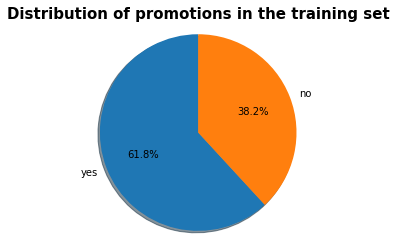

In [183]:
plot_pie(df_train, 'Promo', ['yes', 'no'], "Distribution of promotions in the training set")

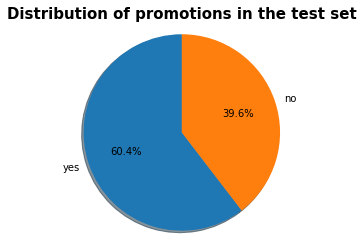

In [184]:
plot_pie(df_test, 'Promo', ['yes', 'no'], "Distribution of promotions in the test set")

#### Distrubitions of Sales per Holiday

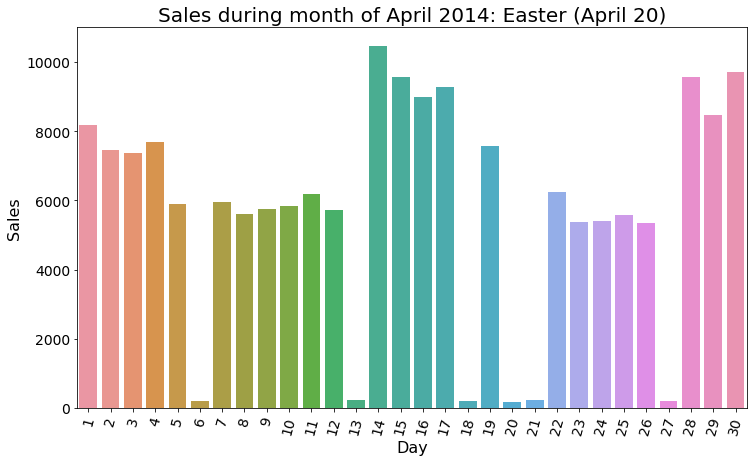

In [187]:
plot_monthly_sales(df_train, 4, 2014, 'Sales during month of April 2014: Easter (April 20)')

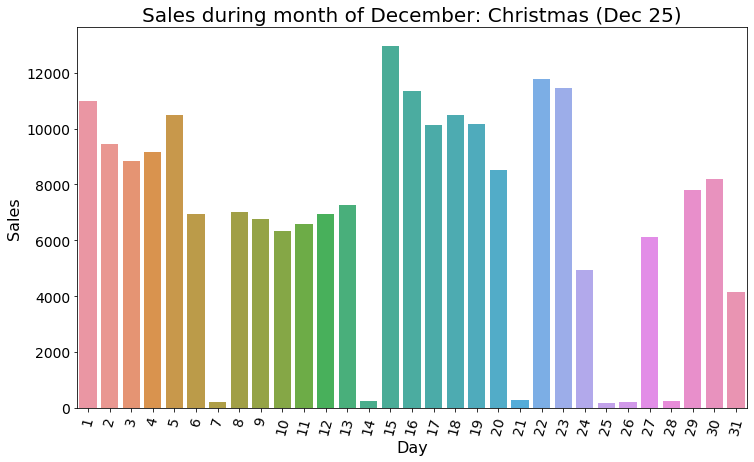

In [188]:
plot_monthly_sales(df_train, 12, 2014, 'Sales during month of December: Christmas (Dec 25)')

### Average Sales During the remaining months

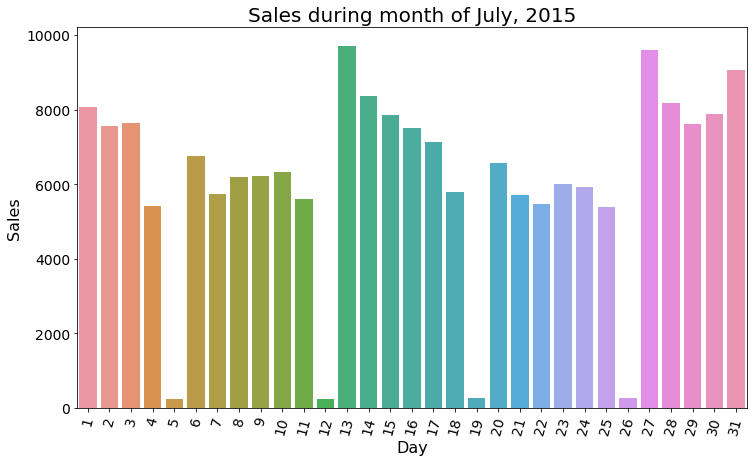

In [190]:
plot_monthly_sales(df_train, 7, 2015, 'Sales during month of July, 2015')

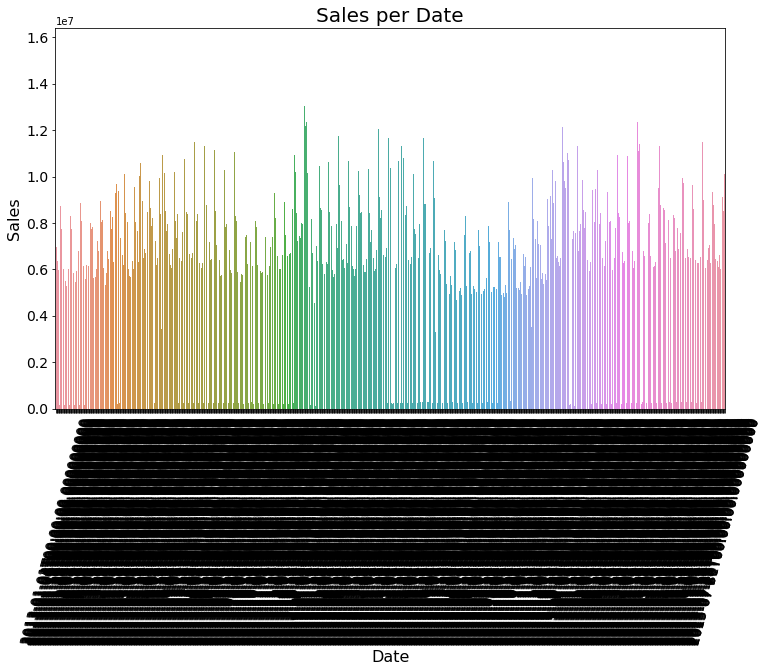

In [134]:
plot_bar(df_train_agg, 'Date', 'Sales', 'Sales per Date', 'Date', 'Sales')

#### Correlations between Sales and number of customers